# **Step 1: Load and Understand the Dataset**

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
df = pd.read_csv("Student_Performance[1].csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# **Step 2 : Exploratory Data Analysis(EDA)**
# 2.1:Correlation 

In [25]:
# Compute correlation of selected features with Performance Index
selected_features = ["Hours Studied", "Previous Scores", "Performance Index"]
correlation_matrix = df[selected_features].corr()

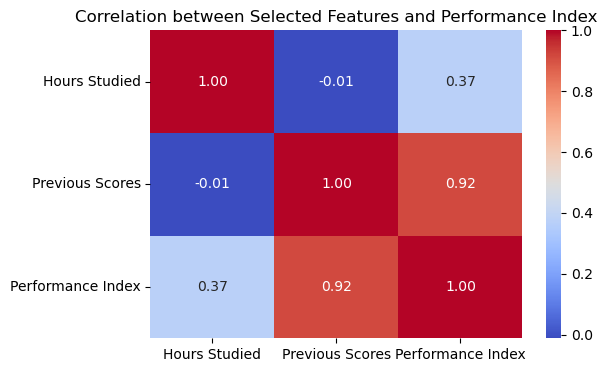

In [27]:
# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Selected Features and Performance Index")
plt.show()

In [29]:
# Display correlation values
print(correlation_matrix)

                   Hours Studied  Previous Scores  Performance Index
Hours Studied            1.00000        -0.012390           0.373730
Previous Scores         -0.01239         1.000000           0.915189
Performance Index        0.37373         0.915189           1.000000


# Key Insights from Correlation Analysis
* **Previous Scores (0.915) → Strong positive correlation with Performance Index.**
* **Hours Studied (0.374) → Moderate positive correlation with Performance Index.**
* **Negligible correlation (-0.012) between Hours Studied and Previous Scores, meaning they are independent predictors.**

# **2.2:Visualizing Relationships**

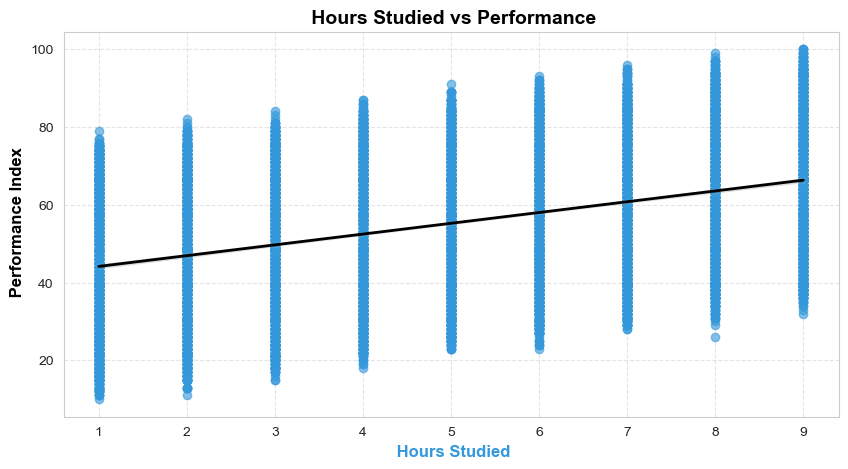

In [86]:

# Set a modern style for the plots
sns.set_style("whitegrid")

# Define a color palette for styling
palette = ["#3498DB", "#E74C3C"]

# Enhanced Scatterplot: Hours Studied vs Performance Index
plt.figure(figsize=(10, 5))
sns.regplot(x=df["Hours Studied"], y=df["Performance Index"], 
            scatter_kws={"color": palette[0], "alpha": 0.6}, 
            line_kws={"color": "black", "lw": 2})
plt.xlabel(" Hours Studied", fontsize=12, fontweight='bold', color=palette[0])
plt.ylabel(" Performance Index", fontsize=12, fontweight='bold', color="black")
plt.title(" Hours Studied vs Performance", fontsize=14, fontweight='bold', color="black")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# Insights from Scatterplots
* **1.Hours Studied vs. Performance Index**

* **Shows a positive trend, but the spread indicates other factors influence performance.**
* **More hours studied generally leads to higher scores.**

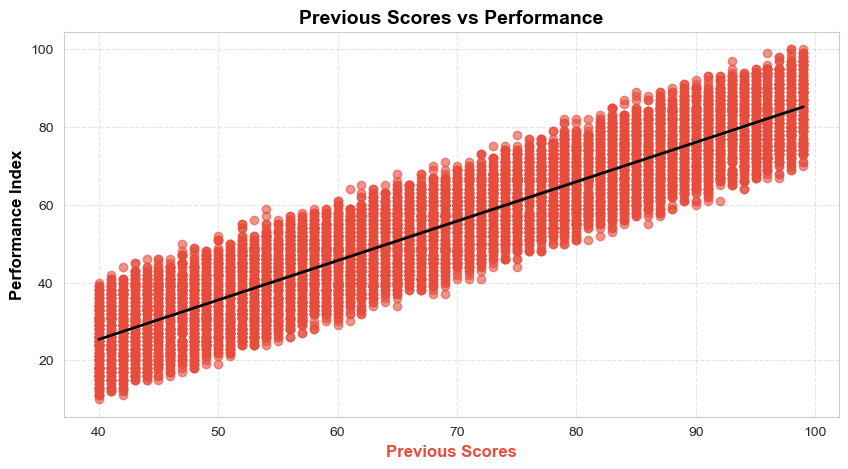

In [94]:
# Enhanced Scatterplot: Previous Scores vs Performance Index
plt.figure(figsize=(10, 5))
sns.regplot(x=df["Previous Scores"], y=df["Performance Index"], 
            scatter_kws={"color": palette[1], "alpha": 0.6}, 
            line_kws={"color": "black", "lw": 2})
plt.xlabel("Previous Scores", fontsize=12, fontweight='bold', color=palette[1])
plt.ylabel("Performance Index", fontsize=12, fontweight='bold', color="black")
plt.title("Previous Scores vs Performance", fontsize=14, fontweight='bold', color="black")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

* **2.Previous Scores vs. Performance Index**

* **Strong linear relationship → Higher previous scores strongly predict future performance.**
* **Less variation compared to Hours Studied.**


# **Step 3: Prepare the Data**


In [108]:
# Select independent variables (predictors)
X = df[["Hours Studied", "Previous Scores"]]

# Define the dependent variable (target)
y = df["Performance Index"]

In [128]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape of training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (8000, 2)
Testing set shape: (2000, 2)


# 3: Data Preparation
* Selected "Hours Studied" and "Previous Scores" as independent variables (X).
* Performance Index is the dependent variable (y).
* Split the dataset into:
* Training set: 8,000 samples (80%)
* Testing set: 2,000 samples (20%).

In [126]:
X_train

,Hours Studied,Previous Scores
9254,5,49
1561,2,48
1670,2,81
6087,2,46
6669,8,47
...,...,...
5734,8,50
5191,4,68
5390,9,48
860,1,47


# **Step 4: Train the Multiple Linear Regression Model**

In [132]:
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [138]:
# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

# Display model parameters
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -29.670259886758878
Coefficients: [2.85815458 1.01737155]


* **Performance Index = intercept + (b1 × Hours Studied)+(b2 × Previous Scores)**  



In [173]:
# Define input values (Hours Studied = 5, Previous Scores = 80) as a DataFrame
new_student = pd.DataFrame([[5, 80]], columns=["Hours Studied", "Previous Scores"])

# Predict Performance Index
predicted_performance = model.predict(new_student)

# Display result
print(f"📚 Predicted Performance Index for a student who studies 5 hours and has a previous score of 80: {predicted_performance[0]:.2f}")

📚 Predicted Performance Index for a student who studies 5 hours and has a previous score of 80: 66.01


In [166]:
# Define input values (Hours Studied = 3, Previous Scores = 70) as a DataFrame
new_student = pd.DataFrame([[3, 60]], columns=["Hours Studied", "Previous Scores"])

# Predict Performance Index
predicted_performance = model.predict(new_student)

# Display result
print(f"📚 Predicted Performance Index for a student who studies 3 hours and has a previous score of 60: {predicted_performance[0]:.2f}")


📚 Predicted Performance Index for a student who studies 3 hours and has a previous score of 60: 39.95


 # Model Interpretation
* **The regression equation is:**


* **PerformanceIndex=−29.67+(2.86×HoursStudied)+(1.02×PreviousScores)**
* Key Takeaways:

* **Hours Studied (2.86): For each additional hour studied, the performance index increases by 2.86 points.**
* **Previous Scores (1.02): For every 1-point increase in previous scores, the performance index increases by 1.02 points.**
* **Intercept (-29.67): If a student has 0 hours studied and 0 previous scores, the model predicts a performance index of -29.67 (not realistic but part of the equation).**

# **Step 5: Make Predictions**

In [168]:
# Predict on test data
y_pred = model.predict(X_test)

# Display actual vs predicted values
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison.head())

      Actual  Predicted
6252    51.0  54.819150
4684    20.0  22.845140
1731    46.0  47.309629
4742    28.0  30.208273
4521    41.0  44.257514


# **Step 6: Evaluate Model Performance**

In [195]:
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f" * Mean Absolute Error (MAE): {mae:.2f}")
print(f" * Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" * R² Score: {r2:.4f}")


 * Mean Absolute Error (MAE): 1.83
 * Root Mean Squared Error (RMSE): 2.29
 * R² Score: 0.9859


# **Step 7: Residual Analysis**


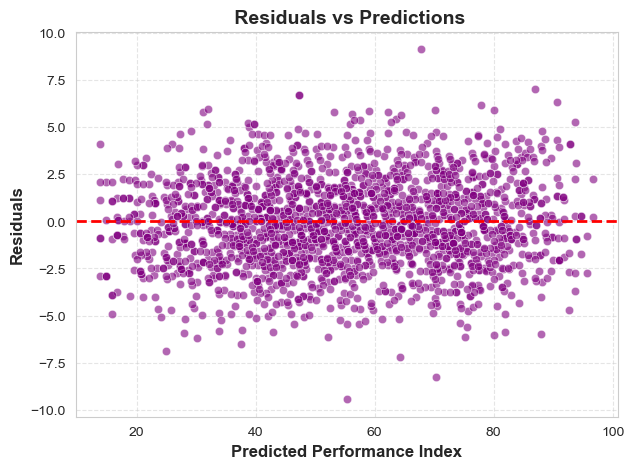

In [200]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals, color="purple", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Performance Index", fontsize=12, fontweight='bold')
plt.ylabel("Residuals", fontsize=12, fontweight='bold')
plt.title(" Residuals vs Predictions", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


 **Model Evaluation**
* Mean Absolute Error (MAE): 1.83 → On average, predictions are off by 1.83 points.
* Root Mean Squared Error (RMSE): 2.29 → Typical prediction error.
* R² Score: 0.986 → The model explains 98.6% of the variance in student performance, indicating a strong fit.

# Summary of Steps:
* **✅ Step 1: Import Libraries , Load & Explore Data**
* **✅ Step 3: EDA (Correlation & Visualizations)**
* **✅ Step 3: Prepare Data (Feature Selection & Splitting)**
* **✅ Step 4: Train MLR Model**
* **✅ Step 5: Make Predictions**
* **✅ Step 6: Evaluate Model Performance**
* **✅ Step 7: Residual Analysis**